<h1>Visualizations of results from modeltesting</h1>

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('results/avg_results.csv')
df_results = pd.read_csv('results/results.csv')
print(len(os.listdir('output')))
averaged_df = df.groupby('Model', as_index=False)[['Average time[s]', 'Average tokens/s']].mean()

lang_error_dict = {}

lang_counts = df[df['Inteded purpose'] == 'coding']['Language errors'].value_counts()
lang_error = df_results['results'].str.split(',').reset_index(drop=True)

for lang_list in lang_error:
    for lang in lang_list:
        if lang not in lang_error_dict:
            lang_error_dict[lang] = 0
        lang_error_dict[lang] += 1
        

# Retrieve language with most errors
max_index = max(lang_error_dict, key=lang_error_dict.get)
colors = ['crimson',] * len(lang_error_dict)
max_pos = list(lang_error_dict.keys()).index(max_index)
colors[max_pos] = 'lightslategray'

# Plot Distribution of Syntax Errors 
fig = go.Figure(
    data=[go.Bar(
        x=list(lang_error_dict.keys()),
        y=list(lang_error_dict.values()),
        marker_color=colors
    )]
)
fig.update_layout(
    xaxis_title='Language with syntax errors',
    yaxis_title='Number of models',
    width=1000,
    height=600
)
fig.show()


# Count number models with atleast one appearence of each language
lang_occurences = {}
models = os.listdir('output')
for model in models:
    path = Path('output') / model
    code_snippets = os.listdir(path)
    languages_in_model = set()
    for code_snippet in code_snippets:
        if code_snippet.endswith('go'):
            lang = 'go'
            go_codes = os.listdir(path / code_snippet)
            for go_code in go_codes:
                if lang not in lang_occurences:
                    lang_occurences[lang] = 0
                if lang not in languages_in_model:
                    languages_in_model.add(lang)
                    lang_occurences[lang] += 1
        else:
            lang = code_snippet.split('.')[1]
            if lang not in lang_occurences:
                lang_occurences[lang] = 0
            if lang not in languages_in_model:
                languages_in_model.add(lang)
                lang_occurences[lang] += 1
    


# Plot number of models containing atleaste one appearance of language
fig = px.bar(
    x=list(lang_occurences.keys()),
    y=list(lang_occurences.values()),
    labels={'x': 'Language', 'y': 'Number of occurrences'},
    title='Occurrences of Languages in Model Code Snippets'
)

fig.update_layout(
    xaxis_title='Language',
    yaxis_title='Number of occurrences',
    width=1000,
    height=600
)
fig.show()


# Plot total models containing language vs models with language errors
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(lang_occurences.keys()),
    y=list(lang_occurences.values()),
    name='Total Occurrences',
    hovertemplate='Language: %{x}<br>Total: %{y}<extra></extra>',
    marker_color='lightslategray'
))

fig.add_trace(go.Bar(
    x=list(lang_error_dict.keys()),
    y=list(lang_error_dict.values()),
    name='Models with Language Errors',
    hovertemplate='Language: %{x}<br>Containing errors: %{y}<extra></extra>',
    marker_color='crimson'
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Language',
    yaxis_title='Number of Models',
    title='Total vs occurrences of Language Errors in Models',
    width=1000,
    height=600
)
fig.show()


> *Note*: Java will almost always contain 'syntax-errors', due to its strict syntax rules. It will not compile if for instance a class is defined, but the file is not named after the class. This is not inheritently a problem with the model, but rather a limitation of syntax-checking the language itself.

In [57]:
# Plot of Average Time[s] and Average Tokens/s

fig = px.scatter(
    averaged_df,
    x='Average time[s]',
    y='Average tokens/s',
    hover_name='Model',
    color='Model',
)
fig.update_traces(marker=dict(size=12, opacity=0.7))
fig.show()

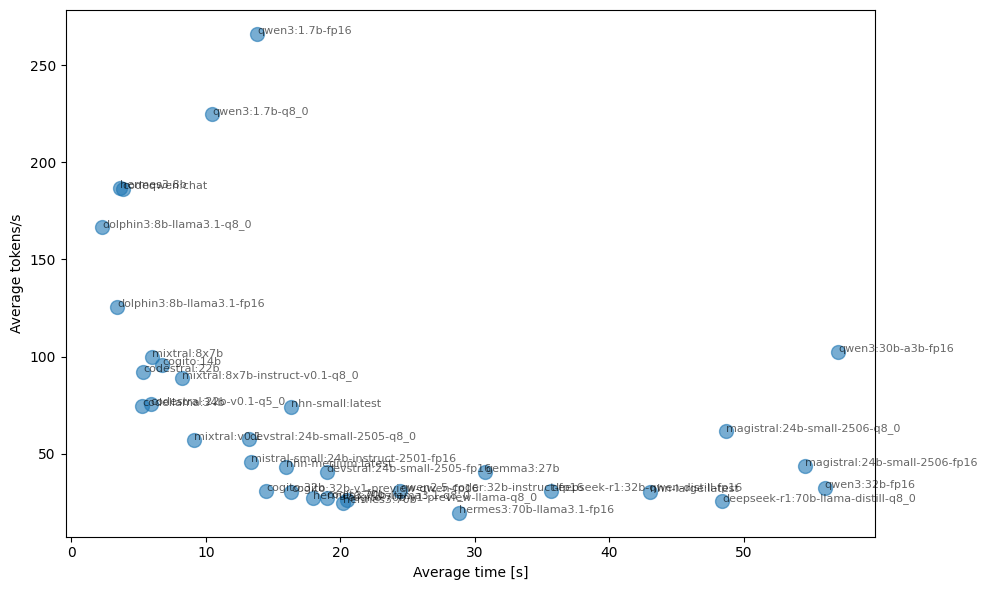

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    averaged_df['Average time[s]'],
    averaged_df['Average tokens/s'],
    s=100, alpha=0.6
)

for i, row in averaged_df.iterrows():
    ax.text(
        row['Average time[s]'],
        row['Average tokens/s'],
        row['Model'],
        fontsize=8,
        alpha=0.6
    )

ax.set_xlabel('Average time [s]')
ax.set_ylabel('Average tokens/s')
plt.tight_layout()
plt.show()


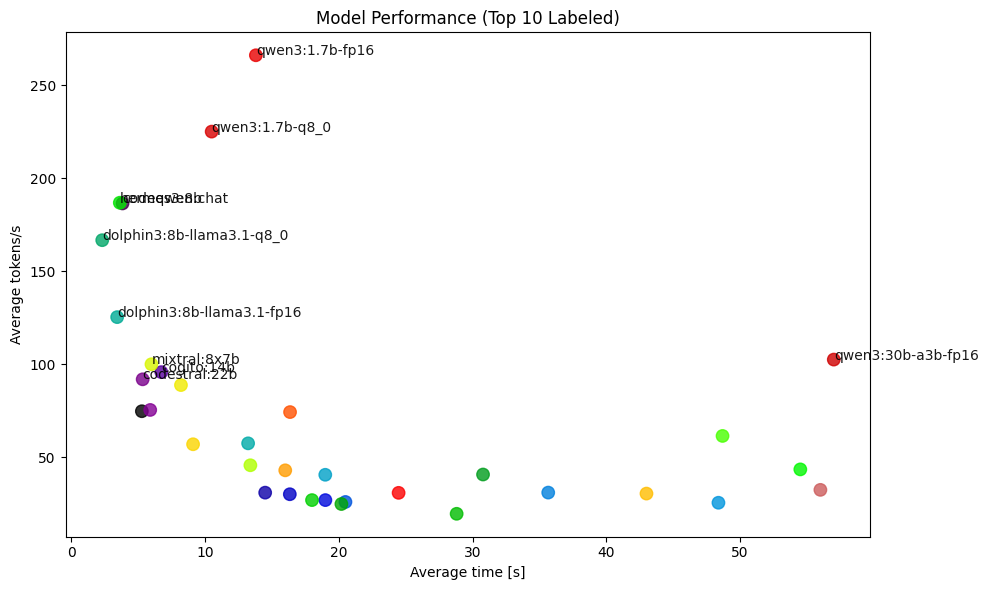

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('results/avg_results.csv')

# Average grouped values
averaged_df = df.groupby('Model', as_index=False)[['Average time[s]', 'Average tokens/s']].mean()

# Convert models to categorical codes
categories = averaged_df['Model'].astype('category')
codes = categories.cat.codes
num_categories = len(categories)

# Get N evenly spaced colors from the colormap
cmap = plt.colormaps['nipy_spectral']
colors = [cmap(i / num_categories) for i in range(num_categories)]

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(
    averaged_df['Average time[s]'],
    averaged_df['Average tokens/s'],
    c=[colors[code] for code in codes],
    s=80,
    alpha=0.8
)

# Annotate top 10 performers
top_n = 10
top_df = averaged_df.sort_values('Average tokens/s', ascending=False).head(top_n)
for _, row in top_df.iterrows():
    ax.text(
        row['Average time[s]'],
        row['Average tokens/s'], 
        row['Model'], 
        fontsize=10, 
        alpha=0.9
    )

ax.set_xlabel('Average time [s]')
ax.set_ylabel('Average tokens/s')
ax.set_title('Model Performance (Top 10 Labeled)')
plt.tight_layout()
plt.show()
